In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

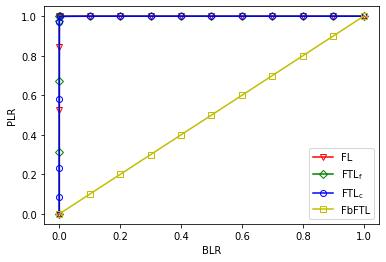

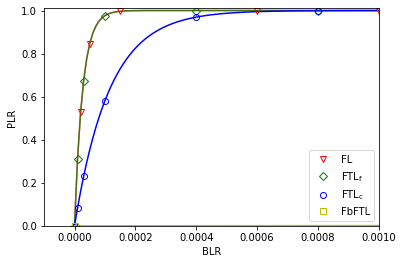

In [ ]:
# comparison, PLR against BLR
batch = np.array([153144650, 153144650, 35665418, 4096]) / 4096
BER = np.arange(0, 1, 0.00001)
PLR_0 = 1-(1-BER)**batch[0]
PLR_1 = 1-(1-BER)**batch[1]
PLR_2 = 1-(1-BER)**batch[2]
PLR_3 = 1-(1-BER)**batch[3]

# P = np.array([153144650, 153144650, 35665418, 4096]) * 32

# plt.plot(BER, PLR_0, color='r', alpha=0.4)
# plt.plot(BER, PLR_1, color='g', alpha=0.4)
# plt.plot(BER, PLR_2, color='b', alpha=0.4)
# plt.plot(BER, PLR_3, color='y')

BER_m = np.arange(0, 1.000001, 0.1)
BER_m_1 = np.concatenate((np.array([0, 0.00001, 0.00003, 0.0001, 0.0004, 0.0008]), np.arange(0.09999999, 1.000001, 0.1)))
BER_m_2 = np.concatenate((np.array([0, 0.00002, 0.00005, 0.00015, 0.0006, 0.001]), np.arange(0.09999999, 1.000001, 0.1)))
PLR_0_m = 1-(1-BER_m_2)**batch[0]
PLR_1_m = 1-(1-BER_m_1)**batch[1]
PLR_2_m = 1-(1-BER_m_1)**batch[2]
PLR_3_m = 1-(1-BER_m)**batch[3]
plt.plot(BER_m_2, PLR_0_m, marker='v', markerfacecolor='None', markeredgecolor='r', color='r', label='FL')
plt.plot(BER_m_1, PLR_1_m, marker='D', markerfacecolor='None', markeredgecolor='g', color='g', label='$\mathregular{FTL_f}$')
plt.plot(BER_m_1, PLR_2_m, marker='o', markerfacecolor='None', markeredgecolor='b', color='b', label='$\mathregular{FTL_c}$')
plt.plot(BER_m, PLR_3_m, marker='s', markerfacecolor='None', markeredgecolor='y', color='y', label='FbFTL')
plt.xlabel('BLR')
plt.ylabel('PLR')
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.legend(loc='lower right')

plt.figure()
plt.plot(BER, PLR_0, color='r', alpha=0.7)
plt.plot(BER, PLR_1, color='g', alpha=0.7)
plt.plot(BER, PLR_2, color='b')
plt.plot(BER, PLR_3, color='y')
plt.plot(BER_m_2, PLR_0_m, marker='v', markerfacecolor='None', markeredgecolor='r', linestyle = 'None', label='FL')
plt.plot(BER_m_1, PLR_1_m, marker='D', markerfacecolor='None', markeredgecolor='g', linestyle = 'None', label='$\mathregular{FTL_f}$')
plt.plot(BER_m_1, PLR_2_m, marker='o', markerfacecolor='None', markeredgecolor='b', linestyle = 'None', label='$\mathregular{FTL_c}$')
plt.plot(BER_m, PLR_3_m, marker='s', markerfacecolor='None', markeredgecolor='y', linestyle = 'None', label='FbFTL')
plt.xlabel('BLR')
plt.ylabel('PLR')
plt.xlim(-0.0001, 0.001)
plt.ylim(0, 1.01)
plt.legend(loc='lower right')
plt.show()

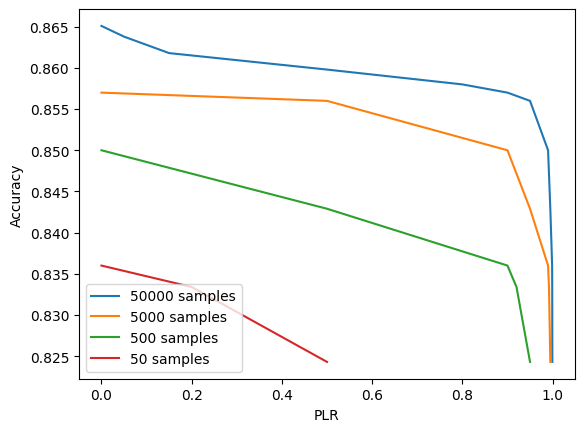

In [ ]:
# FbFTL, insufficient data
PLR = np.array([0, 0.05, 0.1, 0.15, 0.5, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9992, 0.9995])
# epo = np.array([84, 56, 41, 47, 45, 50, 44, 31, 38, 66, 123, 129, 97])
# acc = np.array([0.8559, 0.8530, 0.8503, 0.8502, 0.8479, 0.8395, 0.8263, 0.8146, 0.7805, 0.7580, 0.7276, 0.7232, 0.7015])
acc = np.array([0.8651, 0.8638, 0.8628, 0.8618, 0.8598, 0.858, 0.857, 0.856, 0.85, 0.8429, 0.836, 0.8334, 0.8243])

div_0 = np.where(PLR==0.9)[0][0]
PLR_div_0 = (PLR[div_0:] - PLR[div_0]) / (1 - PLR[div_0])
acc_div_0 = acc[div_0:]

div = np.where(PLR==0.99)[0][0]
PLR_div = (PLR[div:] - PLR[div]) / (1 - PLR[div])
acc_div = acc[div:]

div_1 = np.where(PLR==0.999)[0][0]
PLR_div_1 = (PLR[div_1:] - PLR[div_1]) / (1 - PLR[div_1])
acc_div_1 = acc[div_1:]

plt.plot(PLR, acc, label=str(int(50000*(1-0.)))+' samples')
plt.plot(PLR_div_0, acc_div_0, label='5000 samples')
plt.plot(PLR_div, acc_div, label=str(int(50000*(1-0.99)))+' samples')
plt.plot(PLR_div_1, acc_div_1, label=str(int(50000*(1-0.999)))+' samples')
plt.legend()
plt.xlabel('PLR')
plt.ylabel('Accuracy')
plt.show()

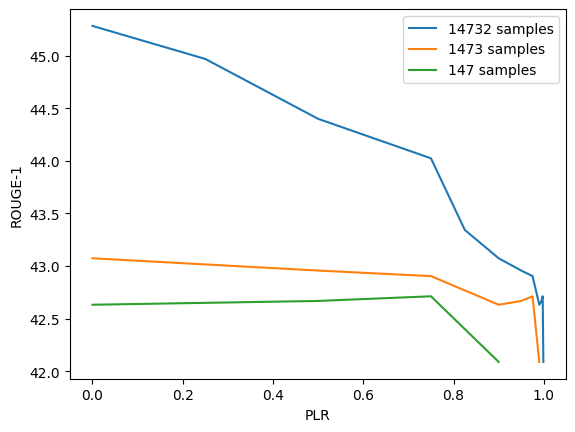

In [ ]:
# FbFTL, insufficient data (on FLAN-T5-small for SAMSum)
PLR = np.array([0, 0.25, 0.5, 0.75, 0.825, 0.9, 0.95, 0.975, 0.99, 0.995, 0.9975, 0.999])
# epo = np.array([12, 19, 19, 18, 9, 4, 6, 6, 6, 5, 6, 1])
rouge1 = np.array([45.2827, 44.9688, 44.3995, 44.0240, 43.3430, 43.0738, 42.9570, 42.9042, 42.6320, 42.6681, 42.7124, 42.0884])

div_0 = np.where(PLR==0.9)[0][0]
PLR_div_0 = (PLR[div_0:] - PLR[div_0]) / (1 - PLR[div_0])
acc_div_0 = rouge1[div_0:]

div = np.where(PLR==0.99)[0][0]
PLR_div = (PLR[div:] - PLR[div]) / (1 - PLR[div])
acc_div = rouge1[div:]

# div_1 = np.where(PLR==0.999)[0][0]
# PLR_div_1 = (PLR[div_1:] - PLR[div_1]) / (1 - PLR[div_1])
# acc_div_1 = acc[div_1:]

plt.plot(PLR, rouge1, label='14732 samples')
plt.plot(PLR_div_0, acc_div_0, label='1473 samples')
plt.plot(PLR_div, acc_div, label='147 samples')
plt.legend()
plt.xlabel('PLR')
plt.ylabel('ROUGE-1')
plt.show()

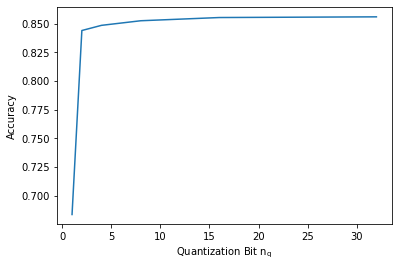

In [ ]:
# FbFTL, insufficient data
nq = np.array([32, 16, 8, 4, 2, 1])  # , np.log2(3)
#             [0, -1, -1,-1,-1,-1]
epo = np.array([84, 53, 43, 39, 33, 51])
acc = np.array([0.8559, 0.8553, 0.8525, 0.8485, 0.8440, 0.6838])  # , 0.8432

plt.plot(nq, acc)
plt.xlabel('Quantization Bit $\mathregular{n_q}$')
plt.ylabel('Accuracy')
plt.show()

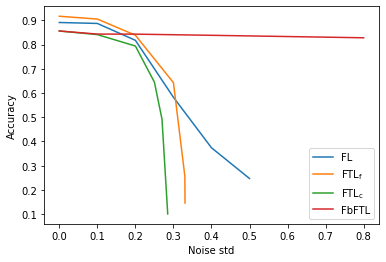

In [ ]:
# plt.rcParams['figure.figsize'] = [10, 7]

FL_noise = [0, 0.1, 0.2, 0.3, 0.4, 0.5]  # std ratio, sigma * R
FL_epo = [105, 26, 6, 2, 1, 1]
FL_acc = [0.891, 0.8871, 0.8174, 0.5823, 0.3739, 0.2469]

FTLf_noise = [0, 0.1, 0.2, 0.3, 0.33, 0.3305]  # std ratio
FTLf_epo = [31, 9, 4, 1, 1, 1]
FTLf_acc = [0.9168, 0.9052, 0.8385, 0.6425, 0.257, 0.1457]

FTLc_noise = [0, 0.1, 0.2, 0.25, 0.27, 0.285]  # std ratio
FTLc_epo = [84, 24, 4, 1, 1, 1]
FTLc_acc = [0.8559, 0.841, 0.7939, 0.6447, 0.4916, 0.1008]

FbFTL_noise = [0, 0.1, 0.2, 0.4, 0.8]  # std ratio
FbFTL_epo = [84, 147, 85, 40, 16]
FbFTL_acc = [0.8559, 0.8432, 0.8429, 0.8381, 0.8279]

plt.plot(FL_noise, FL_acc, label='FL')
plt.plot(FTLf_noise, FTLf_acc, label='$\mathregular{FTL_f}$')
plt.plot(FTLc_noise, FTLc_acc, label='$\mathregular{FTL_c}$')
plt.plot(FbFTL_noise, FbFTL_acc, label='FbFTL')
plt.xlabel('Noise std')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# plt.figure()

# plt.plot(np.square(FL_noise), FL_acc, label='FL')
# plt.plot(np.square(FTLf_noise), FTLf_acc, label='$\mathregular{FTL_f}$')
# plt.plot(np.square(FTLc_noise), FTLc_acc, label='$\mathregular{FTL_c}$')
# plt.plot(np.square(FbFTL_noise), FbFTL_acc, label='FbFTL')
# plt.xlabel('Noise Ratio')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:
np.interp(0.0231*0.7, FTLc_noise, FTLc_acc)  # sigma*R, accuracy

0.85349067

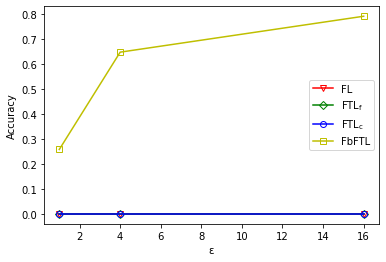

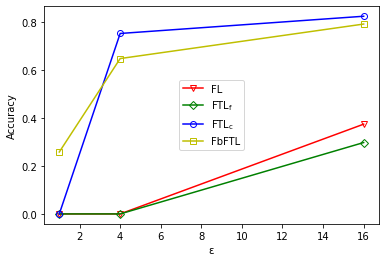

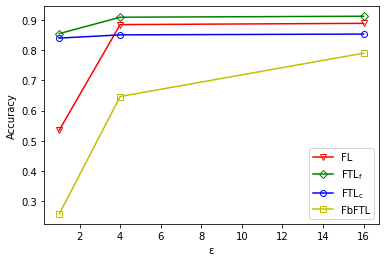

In [ ]:
epsilon = [1, 4, 16]
FL_acc_K4 = [0, 0, 0]
FL_acc_K100 = [0, 0, 0.3736]
FL_acc_K600 = [0.5354, 0.8849, 0.8891]
FTLf_acc_K4 = [0, 0, 0]
FTLf_acc_K100 = [0, 0, 0.2971]
FTLf_acc_K600 = [0.8551, 0.9094, 0.9126]
FTLc_acc_K4 = [0, 0, 0]
FTLc_acc_K100 = [0, 0.7511, 0.8228]
FTLc_acc_K600 = [0.8402, 0.8509, 0.8535]
FbFTL_acc_K = [0.2577, 0.6467, 0.7903]

plt.plot(epsilon, FL_acc_K4, marker='v', markerfacecolor='None', markeredgecolor='r', color='r', label='FL')
plt.plot(epsilon, FTLf_acc_K4, marker='D', markerfacecolor='None', markeredgecolor='g', color='g', label='$\mathregular{FTL_f}$')
plt.plot(epsilon, FTLc_acc_K4, marker='o', markerfacecolor='None', markeredgecolor='b', color='b', label='$\mathregular{FTL_c}$')
plt.plot(epsilon, FbFTL_acc_K, marker='s', markerfacecolor='None', markeredgecolor='y', color='y', label='FbFTL')
plt.xlabel('$\mathregular{\epsilon}$')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epsilon, FL_acc_K100, marker='v', markerfacecolor='None', markeredgecolor='r', color='r', label='FL')
plt.plot(epsilon, FTLf_acc_K100, marker='D', markerfacecolor='None', markeredgecolor='g', color='g', label='$\mathregular{FTL_f}$')
plt.plot(epsilon, FTLc_acc_K100, marker='o', markerfacecolor='None', markeredgecolor='b', color='b', label='$\mathregular{FTL_c}$')
plt.plot(epsilon, FbFTL_acc_K, marker='s', markerfacecolor='None', markeredgecolor='y', color='y', label='FbFTL')
plt.xlabel('$\mathregular{\epsilon}$')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epsilon, FL_acc_K600, marker='v', markerfacecolor='None', markeredgecolor='r', color='r', label='FL')
plt.plot(epsilon, FTLf_acc_K600, marker='D', markerfacecolor='None', markeredgecolor='g', color='g', label='$\mathregular{FTL_f}$')
plt.plot(epsilon, FTLc_acc_K600, marker='o', markerfacecolor='None', markeredgecolor='b', color='b', label='$\mathregular{FTL_c}$')
plt.plot(epsilon, FbFTL_acc_K, marker='s', markerfacecolor='None', markeredgecolor='y', color='y', label='FbFTL')
plt.xlabel('$\mathregular{\epsilon}$')
plt.ylabel('Accuracy')
plt.legend()